# Train - Test Split

In [1]:
# Author: Arnova Abdullah
# Date: 05-05-2022
# Description: Code for creating stratified train-test split of the music genre dataset

# Edits:
# (14-05-2022)
# (22-05-2022) Created test train split w.r.t to danceability feature from new modified feature set.

## Importing modules

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import matplotlib.pyplot as plt
%matplotlib inline

## Loading data 

In [3]:
df = pd.read_csv('data/genre_data_final.csv')
df.head()

,danceability,key,mode,speechiness,liveness,tempo,time_signature,genre
0,0.507,5,1,0.0291,0.170,134.647,4,acoustic
1,0.496,11,1,0.0336,0.109,144.092,3,acoustic
2,0.760,0,1,0.0352,0.233,107.602,4,acoustic
3,0.607,1,1,0.0595,0.111,111.031,4,acoustic
4,0.497,3,1,0.0704,0.133,206.431,4,acoustic


In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["genre"] = le.fit_transform(df["genre"])
df.head()

,danceability,key,mode,speechiness,liveness,tempo,time_signature,genre
0,0.507,5,1,0.0291,0.170,134.647,4,0
1,0.496,11,1,0.0336,0.109,144.092,3,0
2,0.760,0,1,0.0352,0.233,107.602,4,0
3,0.607,1,1,0.0595,0.111,111.031,4,0
4,0.497,3,1,0.0704,0.133,206.431,4,0


## Stratified train-test split

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=["danceability",'key','mode',"speechiness","liveness",'tempo','time_signature',"genre"])
df_scaled.head()

,danceability,key,mode,speechiness,liveness,tempo,time_signature,genre
0,0.484368,0.454545,1.0,0.007415,0.163214,0.557066,0.8,0.0
1,0.472427,1.000000,1.0,0.012395,0.101117,0.610400,0.6,0.0
2,0.759010,0.000000,1.0,0.014166,0.227347,0.404349,0.8,0.0
3,0.592922,0.090909,1.0,0.041058,0.103153,0.423712,0.8,0.0
4,0.473513,0.272727,1.0,0.053121,0.125548,0.962415,0.8,0.0


The aim of stratified test-train split is to create a test set which is representative of the training set's distribution. Therefore, we first need to identify a feature and based on this feature's distribution, we will create the stratified test-train split.

### Histograms of various features

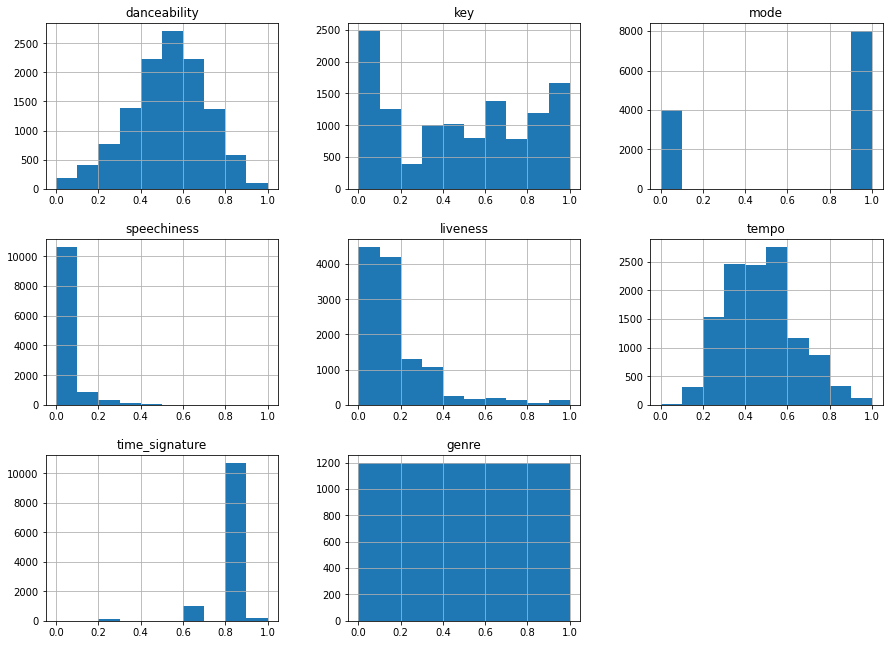

In [6]:
df_scaled.hist(figsize=(15,11));

The feature `danceability` has a nearly Gaussian distribution with a mean value around `0.5` and is a good candidate to be stratified with.

### Categorizing `danceability`

To stratify with respect to `danceability`, we need to create categories out of it where certain range values of `danceability` are grouped into a category.

<AxesSubplot:>

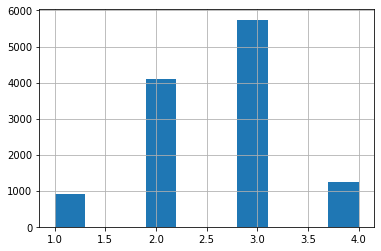

In [7]:
df_scaled["danceability_cat"] = pd.cut(
    df_scaled["danceability"],
    bins=[0, 0.25, 0.5, 0.75, np.inf],
    labels=[1, 2, 3, 4]
)
df_scaled["danceability_cat"].hist()

### Stratified test-train split creation

Finally, we create the Stratified train test split with respect to `danceability_cat` attribute.

In [8]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=43)
for train_index, test_index in split.split(df_scaled, df_scaled["danceability_cat"]):
    strat_train = df_scaled.loc[train_index]
    strat_test = df_scaled.loc[test_index]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Verification of Stratified test-train split

We plot the histogram of the training set and the test set to verify if they have the same distribution.

In [9]:
def strat_plot(x, y, tx, ty):
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    ax[0].hist(x);
    ax[1].hist(y);
    ax[0].grid()
    ax[1].grid()
    ax[0].set_title(tx);
    ax[1].set_title(ty);

In [10]:
strat_plot(
    strat_train['danceability_cat'],
    strat_test['danceability_cat'],
    "Histogram for Training set w.r.t energy_cat",
    "Histogram for Test set w.r.t energy_cat"
)

NameError: name 'strat_train' is not defined

As we see, both the histograms have identical shapes. We further verify by comparing other statistical data of the training set and the test set.

In [19]:
def strat_join(x, y):
    return pd.concat(
        [x, y],
        axis=1,
        keys=['Test set', 'Training set']
    )

strat_join(strat_test.describe()['danceability'], 
         strat_train.describe()['danceability'])

,Test set,Training set
count,2400.000000,9600.000000
mean,0.546487,0.545705
std,0.167679,0.165711
min,0.064600,0.060800
25%,0.438750,0.442000
50%,0.555000,0.556000
75%,0.668000,0.661000
max,0.967000,0.982000


As we see, the training set and the test set have nearly identical statistical properties. Thus we have created a stratified split. We now export the sets. We also create similar train test splits with respect the remaining features.

### Exporting to CSV

Before we export, we drop the feature `danceability_cat` since it is no longer required.

In [21]:
strat_test.drop('danceability_cat', axis=1, inplace=True)
strat_train.drop('danceability_cat', axis=1, inplace=True)

Finally, we export the test and training set as two separate files.

In [24]:
strat_test.to_csv('data/genre_data_test.csv', index=False)
strat_train.to_csv('data/genre_data_train.csv', index=False)